IMPORTS

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
from torchvision import datasets
from time import perf_counter

LOADING DATA

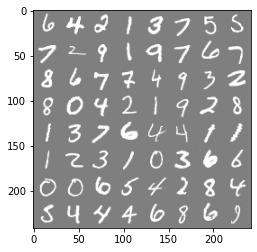

In [35]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

saved_model_path = './mdl.pth'
batchsize = 64

train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = transforms.ToTensor(), 
    download = True,            
)

test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = transforms.ToTensor()
)

train_loader = torch.utils.data.DataLoader(train_data,batch_size=batchsize,shuffle=True,num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=batchsize,shuffle=True,num_workers=2)

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))

MODEL

In [36]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()

        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 6, 
                            kernel_size = 5, stride = 1, padding = 2)
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 16, 
                            kernel_size = 5, stride = 1, padding = 0)
        self.conv3 = nn.Conv2d(in_channels = 16, out_channels = 120, 
                            kernel_size = 5, stride = 1, padding = 0)
        self.linear1 = nn.Linear(120, 84)
        self.linear2 = nn.Linear(84, 10)
        self.tanh = nn.Tanh()
        self.avgpool = nn.AvgPool2d(kernel_size = 2, stride = 2)

    def forward(self, x):
        x = self.conv1(x)
        x = self.tanh(x)
        x = self.avgpool(x)
        x = self.conv2(x)
        x = self.tanh(x)
        x = self.avgpool(x)
        x = self.conv3(x)
        x = self.tanh(x)
        
        x = x.reshape(x.shape[0], -1)
        x = self.linear1(x)
        x = self.tanh(x)
        x = self.linear2(x)
        return x

In [37]:
model = LeNet().to(device)
print(model)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (linear1): Linear(in_features=120, out_features=84, bias=True)
  (linear2): Linear(in_features=84, out_features=10, bias=True)
  (tanh): Tanh()
  (avgpool): AvgPool2d(kernel_size=2, stride=2, padding=0)
)


TRAINING

1 loss: 2.299
1 loss: 2.289
1 loss: 2.277
1 loss: 2.261
1 loss: 2.237
1 loss: 2.204
1 loss: 2.148
1 loss: 2.044
1 loss: 1.878
1 loss: 1.637
1 loss: 1.423
1 loss: 1.232
1 loss: 1.101
1 loss: 0.998
2 loss: 0.880
2 loss: 0.789
2 loss: 0.739
2 loss: 0.712
2 loss: 0.656
2 loss: 0.623
2 loss: 0.619
2 loss: 0.580
2 loss: 0.558
2 loss: 0.557
2 loss: 0.516
2 loss: 0.501
2 loss: 0.480
2 loss: 0.501
3 loss: 0.461
3 loss: 0.449
3 loss: 0.438
3 loss: 0.430
3 loss: 0.417
3 loss: 0.400
3 loss: 0.412
3 loss: 0.405
3 loss: 0.376
3 loss: 0.355
3 loss: 0.378
3 loss: 0.354
3 loss: 0.357
3 loss: 0.368
4 loss: 0.340
4 loss: 0.351
4 loss: 0.331
4 loss: 0.335
4 loss: 0.340
4 loss: 0.334
4 loss: 0.349
4 loss: 0.310
4 loss: 0.340
4 loss: 0.314
4 loss: 0.310
4 loss: 0.287
4 loss: 0.299
4 loss: 0.304
5 loss: 0.318
5 loss: 0.294
5 loss: 0.286
5 loss: 0.271
5 loss: 0.278
5 loss: 0.279
5 loss: 0.283
5 loss: 0.296
5 loss: 0.274
5 loss: 0.254
5 loss: 0.256
5 loss: 0.257
5 loss: 0.244
5 loss: 0.265
6 loss: 0.272
6 loss

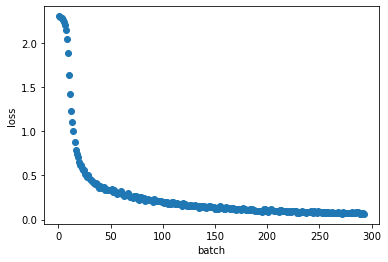

In [38]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

x= []
y = []

timerStart = perf_counter()
for epoch in range(20):  # epochs
    running_loss = 0.0
    for i, data in enumerate(train_loader,0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 64 == 63:
            print(f'{epoch + 1} loss: {running_loss / 64:.3f}')
            x.append((i+epoch*len(train_loader))/64)
            y.append(running_loss / 64)
            running_loss = 0.0
            
timerStop = perf_counter()
print(f'Finished Training in {timerStop-timerStart:0.2f}s') 

plt.scatter(x,y)
plt.xlabel("batch")
plt.ylabel("loss")
plt.show()

SAVING/LOADING MODEL

In [39]:

# torch.save(model.state_dict(), saved_model_path)
# model.load_state_dict(torch.load(saved_model_path))

TESTING MODEL

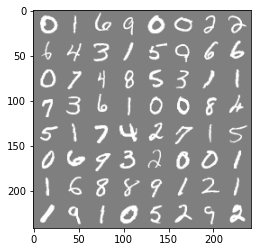

0 - zero
1 - one
6 - six
9 - nine
0 - zero
0 - zero
2 - two
2 - two
6 - six
4 - four
3 - three
1 - one
5 - five
9 - nine
6 - six
6 - six
0 - zero
7 - seven
4 - four
8 - eight
5 - five
3 - three
1 - one
1 - one
7 - seven
3 - three
6 - six
1 - one
0 - zero
0 - zero
8 - eight
6 - six
5 - five
1 - one
7 - seven
4 - four
2 - two
7 - seven
1 - one
5 - five
0 - zero
6 - six
9 - nine
3 - three
2 - two
0 - zero
0 - zero
1 - one
1 - one
6 - six
8 - eight
8 - eight
9 - nine
1 - one
2 - two
1 - one
1 - one
9 - nine
1 - one
0 - zero
5 - five
2 - two
9 - nine
2 - two


In [40]:
dataiter = iter(test_loader)
images, labels = dataiter.next()
images, labels = images.to(device), labels.to(device)

classes = list(test_data.class_to_idx.keys())
outputs = model(images)
_, predicted = torch.max(outputs, 1)

imshow(torchvision.utils.make_grid(images.cpu()))
for i in range(len(predicted)):
    print(classes[predicted[i]])

In [41]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network: {100 * correct // total} %')

Accuracy of the network: 97 %
